<h2> <center> <font color = 'Magenta'> Logistic Regression (Model 1) </h2>

In [140]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from itertools import chain
from matplotlib import pyplot as plt

In [141]:
# Set working Directory
path = "C:/Users/Reena Shrestha/OneDrive - lamar.edu/Desktop/Machine learning/Project_2"
fname = 'WB.csv'
os.chdir(path) 
a = pd.read_csv(fname)
a.head(5)

,Unnamed: 0.1,Unnamed: 0,StateWellNumber,StateWel_1,LatitudeDD,Dlat,Mlat,Slat,LongitudeD,Dlong,...,Chloride_mg/L,Fluoride_mg/L,pH,Texture_SSURGO,Texture_Num,Clay_SSURGO,SAR_SSURGO,EC_SSURGO,label,ppt
0,0,0,1819901,1819901,33.625555,33,37,32.0,-96.658056,96,...,11.00,1.000,8.300000,Silty clay,2,55.0,1,2.0,0,1073.851318
1,1,1,1820804,1820804,33.635834,33,38,9.0,-96.564167,96,...,12.75,1.000,8.750000,Silty clay,2,55.0,1,2.0,0,1074.579956
2,2,2,1820805,1820805,33.641667,33,38,30.0,-96.560278,96,...,13.40,0.300,7.200000,Silty clay,2,55.0,1,2.0,0,1073.386353
3,3,3,1827203,1827203,33.621111,33,37,16.0,-96.683611,96,...,980.25,2.125,8.150000,Silty clay,2,55.0,1,2.0,1,1073.851318
4,4,4,1827801,1827801,33.532500,33,31,57.0,-96.701945,96,...,11.50,0.810,8.734286,Silty clay,2,55.0,1,2.0,0,1051.391113


In [142]:
features = ['TDS_mg/L','SAR', 'WellDepth', 'Hardness_mg/L','Sulfate_mg/L','Chloride_mg/L','EC_SSURGO'] # List of Input features for model
X = a[features] # Dataframe of the data features
Y = a['Fluoride_mg/L'] # Add Y variable to the input deature datframe
X.corr()

,TDS_mg/L,SAR,WellDepth,Hardness_mg/L,Sulfate_mg/L,Chloride_mg/L,EC_SSURGO
TDS_mg/L,1.000000,0.627383,0.407251,0.269447,0.799147,0.769111,0.060182
SAR,0.627383,1.000000,0.660052,-0.377785,0.307199,0.421723,0.080604
WellDepth,0.407251,0.660052,1.000000,-0.278592,0.166646,0.335367,0.061108
Hardness_mg/L,0.269447,-0.377785,-0.278592,1.000000,0.522785,0.151044,0.035050
Sulfate_mg/L,0.799147,0.307199,0.166646,0.522785,1.000000,0.351971,-0.083918
Chloride_mg/L,0.769111,0.421723,0.335367,0.151044,0.351971,1.000000,0.156049
EC_SSURGO,0.060182,0.080604,0.061108,0.035050,-0.083918,0.156049,1.000000


In [121]:
Y

0      1.000000
1      1.000000
2      0.300000
3      2.125000
4      0.810000
         ...   
263    0.400000
264    0.300000
265    0.800000
266    0.200000
267    0.466667
Name: Fluoride_mg/L, Length: 268, dtype: float64

In [122]:
Y.describe()

count    268.000000
mean       1.337922
std        1.068650
min        0.143333
25%        0.500000
50%        1.000000
75%        1.900000
max        5.175000
Name: Fluoride_mg/L, dtype: float64

In [123]:
X = (X-X.min()) / (X.max()-X.min()) # Normalize the data
Y = Y.apply(lambda Y:Y >= 1.9).astype(int) # convert the continuous variable to binary variable with threshold of 1.9

In [124]:
X

,TDS_mg/L,SAR,WellDepth,Hardness_mg/L,Sulfate_mg/L,Chloride_mg/L,EC_SSURGO
0,0.070731,0.211188,0.358791,0.002302,0.011186,0.005512,1.0
1,0.117763,0.242458,0.430969,0.005467,0.016667,0.006890,1.0
2,0.031927,0.212804,0.421737,0.000767,0.005593,0.007402,1.0
3,0.548658,0.684543,0.370541,0.010455,0.005928,0.768701,1.0
4,0.100097,0.460191,0.391523,0.000877,0.028188,0.005906,1.0
...,...,...,...,...,...,...,...
263,0.058452,0.023346,0.064205,0.039900,0.022371,0.040945,0.0
264,0.064346,0.146179,0.092740,0.003837,0.015660,0.040945,0.0
265,0.085713,0.186226,0.076794,0.004220,0.020134,0.018898,0.0
266,0.057715,0.031337,0.059169,0.026089,0.021029,0.029921,0.0


Y

In [125]:
# Split into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

<center> <h2> <font color='blue'> Logistic Regression </h2>

In [126]:
# instantiate the model 
logreg = LogisticRegression(C=10**9) # setting a large C to ensure no regulation

In [127]:
# fit the model to training data
logreg.fit(X_train,Y_train)

LogisticRegression(C=1000000000)

In [128]:
Y_pred = logreg.predict(X_train) # Make Predictions
Yprob = logreg.predict_proba(X_train) #test output probabilities
zz = pd.DataFrame(Yprob)
zz.head()

,0,1
0,0.764829,2.351711e-01
1,0.957476,4.252416e-02
2,0.993412,6.588169e-03
3,0.000008,9.999915e-01
4,1.000000,7.864926e-08


In [129]:
Y_pred1 = logreg.predict(X_test) # Make Predictions
Yprob1 = logreg.predict_proba(X_test) #test output probabilities
zz1 = pd.DataFrame(Yprob1)
zz1.head()

,0,1
0,0.139774,0.860226
1,0.918929,0.081071
2,0.904943,0.095057
3,0.202941,0.797059
4,0.082200,0.917800


In [130]:
logreg.get_params()
logreg.coef_
logreg.intercept_

array([-5.90461147])

In [131]:
print("Accuracy:",metrics.accuracy_score(Y_train, Y_pred)) #Accuracy of the model on training data
print("Precision:",metrics.precision_score(Y_train, Y_pred)) #Precision of the model on training data
print("Recall:",metrics.recall_score(Y_train, Y_pred)) #Recall of the model on training data

Accuracy: 0.9345794392523364
Precision: 0.8888888888888888
Recall: 0.8571428571428571


In [132]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred1)) #Accuracy of the model on testing data
print("Precision:",metrics.precision_score(Y_test, Y_pred1)) #Precision of the model on testing data
print("Recall:",metrics.recall_score(Y_test, Y_pred1)) #Recall of the model on testing data

Accuracy: 0.9444444444444444
Precision: 0.9090909090909091
Recall: 0.8333333333333334


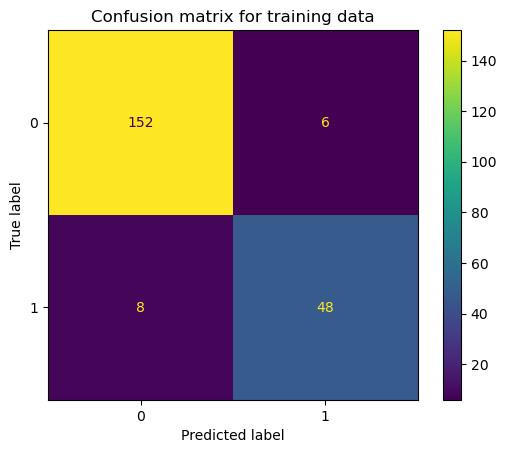

In [133]:
cnf_matrix = metrics.confusion_matrix(Y_train, Y_pred) # Calculate confusion matrix for the model
cnf_matrix # y_train is going be rows (obs), y_pred (predicted) are cols
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot() #create visualization of confusion matrix
plt.title('Confusion matrix for training data')
plt.show() # Display the visualisation

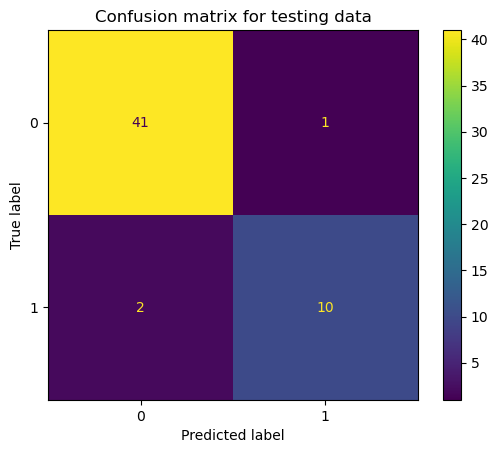

In [134]:
cnf_matrix1 = metrics.confusion_matrix(Y_test, Y_pred1) # Calculate confusion matrix for the model
cnf_matrix1 # y_test is going be rows (obs), y_pred1 (predicted) are cols
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix1)
disp1.plot() #create visualization of confusion matrix
plt.title('Confusion matrix for testing data')
plt.show() # Display the visualisation

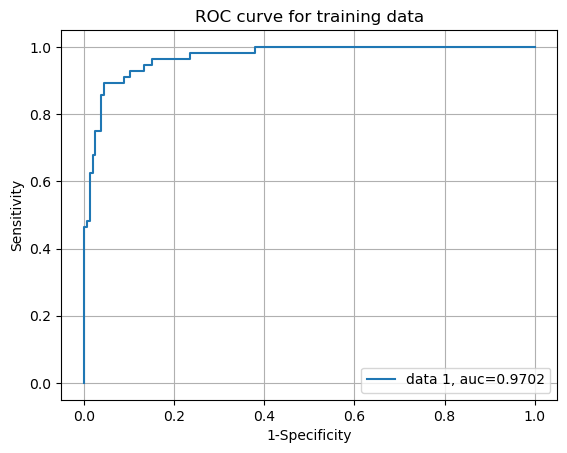

In [135]:
Y_pred_proba = logreg.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_train, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC curve for training data')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

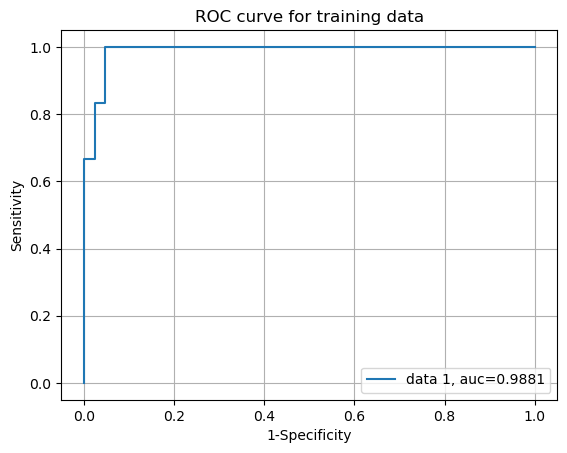

In [136]:
Y_pred_proba1 = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba1)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.title('ROC curve for training data')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

In [137]:
#predict the y variable for all x variables
Y_pred_LR = logreg.predict(X) # predict whole dataset

In [138]:
df_pred = pd.DataFrame(Y_pred_LR, columns = ['LR_pred_Y'])
df_pred1 = pd.concat([a, df_pred], axis=1)

In [139]:
df_pred1.to_csv('Y_pred_LR1.csv')